# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [55]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Your Code Here

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [56]:
# your code here
titanic = pd.read_csv("../data/titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [40]:
categorical = [z for x in [list(titanic.select_dtypes(include="int").columns),(list(titanic.select_dtypes(include="object").columns))] for z in x]
numerical = list(titanic.select_dtypes(include="float").columns)
categorical

['PassengerId',
 'Pclass',
 'SibSp',
 'Parch',
 'Name',
 'Gender',
 'Ticket',
 'Cabin',
 'Embarked']

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [41]:
# your code here
sns.set_style("whitegrid")

#### Use the right visulalization to show the distribution of column `Age`.

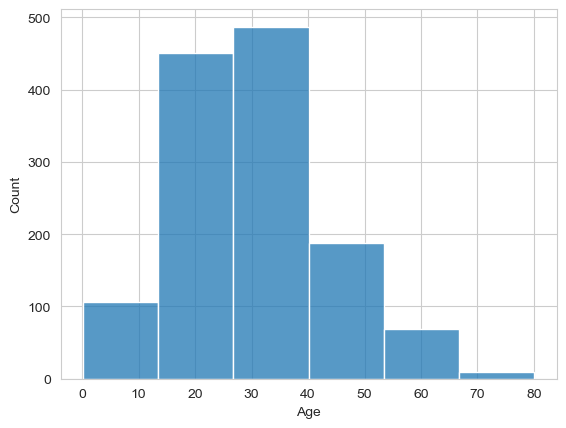

In [53]:
# your code here
sns.histplot(x=titanic.Age, bins=6);

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here

Bins have an interval of values, this range captures a set of values so bins represent the 
frequency of the values within the range. The size of the bins affects the number of bins in 
the plot, the bigger the range of the bin the smaller the total of bins present.

"""

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [67]:
# Method 1 - matplotlib
# your code here
titanic.groupby(by="Gender").agg("count")

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Gender,,,,,,,,,,,
female,466,314,466,466,466,466,466,466,466,466,466
male,843,577,843,843,843,843,843,843,843,843,843


In [ ]:
# Method 2 - seaborn
# your code here
sns.countplot(titanic, x="Gender");

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it and list all the info it's giving you.

[Hint](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here